使用linear激活函式來訓練(0~1)範圍內進行"1的補數"的神經網路

# Include

In [1]:
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "-1"

In [2]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, optimizers, losses
from tensorflow.keras.utils import plot_model
from IPython.display import Image
import matplotlib.pyplot as plt

2022-03-25 21:00:38.677434: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0


# Model

In [3]:
input_1 = keras.Input(shape=(1, ))
output_1 = layers.Dense(1, activation='linear')(input_1)
model = keras.Model(inputs=[input_1], outputs=[output_1])
model.summary()
model.compile(optimizer="adam", loss="mse")
# model.compile(optimizer=optimizers.Adam(0.001), loss=losses.MeanSquaredError())
print(model.get_weights())
# plot_model(model, show_shapes=True)

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 1)]               0         
_________________________________________________________________
dense (Dense)                (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________
[array([[0.6757089]], dtype=float32), array([0.], dtype=float32)]


2022-03-25 21:00:39.946559: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcuda.so.1
2022-03-25 21:00:39.982300: E tensorflow/stream_executor/cuda/cuda_driver.cc:328] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2022-03-25 21:00:39.982346: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:169] retrieving CUDA diagnostic information for host: ubuntu
2022-03-25 21:00:39.982354: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:176] hostname: ubuntu
2022-03-25 21:00:39.982425: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:200] libcuda reported version is: 455.32.0
2022-03-25 21:00:39.982452: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:204] kernel reported version is: 455.32.0
2022-03-25 21:00:39.982458: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:310] kernel version seems to match DSO: 455.32.0
2022-03-25 21:00:39.982774: I tensorflow/core/platform/cpu_feature_gua

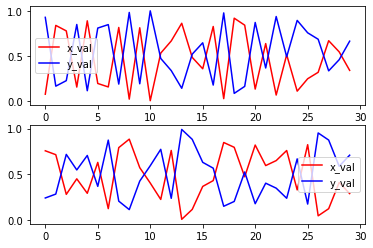

In [4]:
num = 1000
x_train = np.random.rand(num)
y_train = 1 - x_train
x_val = np.random.rand(num)
y_val = 1 - x_val
plt.subplot(211)
plt.plot(x_train[:30], color='r', label='x_val')
plt.plot(y_train[:30], color='b', label='y_val')
plt.legend()
plt.subplot(212)
plt.plot(x_val[:30], color='r', label='x_val')
plt.plot(y_val[:30], color='b', label='y_val')
plt.legend()
plt.show()

In [5]:
model_dir = 'models'
callbacks = list()
''' EarlyStopping '''
callbacks.append(
    keras.callbacks.EarlyStopping(monitor="loss", patience=10, verbose=1, mode="auto")
)
''' ModelCheckpoint '''
# model_name = 'epoch_{epoch:03d}-val_loss_{val_loss:.3f}.hdf5'
# filepath = os.path.join(model_dir, model_name)
# callbacks.append(
#     keras.callbacks.ModelCheckpoint(filepath, monitor='val_loss', verbose=0, save_best_only=False, save_weights_only=False, mode='auto', save_freq='epoch')
# )
''' TensorBoard '''
# log_dir = os.path.join(model_dir, 'log')
# callbacks.append(
#     keras.callbacks.TensorBoard(log_dir=log_dir)
# )
''' trainParam '''
batch_size = 64
epochs = 10000

# Train

In [6]:
trainHistory = model.fit(
    x_train, y_train,
    batch_size=batch_size,
    epochs=epochs,
    validation_data=(x_val, y_val),
    callbacks=callbacks
)

Epoch 1/10000
 1/16 [>.............................] - ETA: 2s - loss: 0.3272

2022-03-25 21:00:40.286858: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:176] None of the MLIR Optimization Passes are enabled (registered 2)
2022-03-25 21:00:40.288564: I tensorflow/core/platform/profile_utils/cpu_utils.cc:114] CPU Frequency: 2300000000 Hz


16/16 [==============================] - 0s 6ms/step - loss: 0.2727 - val_loss: 0.2572
Epoch 2/10000
16/16 [==============================] - 0s 2ms/step - loss: 0.2659 - val_loss: 0.2512
Epoch 3/10000
16/16 [==============================] - 0s 2ms/step - loss: 0.2594 - val_loss: 0.2452
Epoch 4/10000
16/16 [==============================] - 0s 2ms/step - loss: 0.2529 - val_loss: 0.2394
Epoch 5/10000
16/16 [==============================] - 0s 2ms/step - loss: 0.2467 - val_loss: 0.2337
Epoch 6/10000
16/16 [==============================] - 0s 2ms/step - loss: 0.2406 - val_loss: 0.2283
Epoch 7/10000
16/16 [==============================] - 0s 2ms/step - loss: 0.2347 - val_loss: 0.2229
Epoch 8/10000
16/16 [==============================] - 0s 2ms/step - loss: 0.2290 - val_loss: 0.2177
Epoch 9/10000
16/16 [==============================] - 0s 2ms/step - loss: 0.2234 - val_loss: 0.2126
Epoch 10/10000
16/16 [==============================] - 0s 2ms/step - loss: 0.2180 - val_loss: 0.2077
Epo

[array([[-0.9999969]], dtype=float32), array([0.99999833], dtype=float32)]


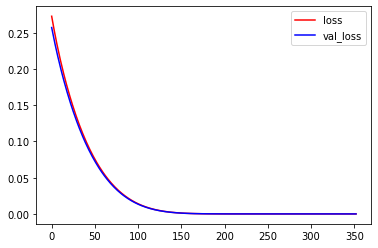

In [7]:
print(model.get_weights())
plt.plot(trainHistory.history['loss'], color='r', label='loss')
plt.plot(trainHistory.history['val_loss'], color='b', label='val_loss')
plt.legend()
plt.show()

# Test

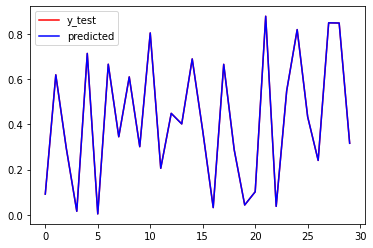

 0.908,  0.092, ads_diff = -0.000
 0.381,  0.619, ads_diff =  0.000
 0.705,  0.295, ads_diff = -0.000
 0.984,  0.016, ads_diff = -0.000
 0.286,  0.714, ads_diff =  0.000
 0.996,  0.004, ads_diff = -0.000
 0.334,  0.666, ads_diff =  0.000
 0.655,  0.345, ads_diff = -0.000
 0.390,  0.610, ads_diff =  0.000
 0.699,  0.301, ads_diff = -0.000
 0.195,  0.805, ads_diff =  0.000
 0.794,  0.206, ads_diff = -0.000
 0.551,  0.449, ads_diff = -0.000
 0.598,  0.402, ads_diff = -0.000
 0.310,  0.690, ads_diff =  0.000
 0.628,  0.372, ads_diff = -0.000
 0.968,  0.032, ads_diff = -0.000
 0.334,  0.666, ads_diff =  0.000
 0.712,  0.288, ads_diff = -0.000
 0.957,  0.043, ads_diff = -0.000
 0.898,  0.102, ads_diff = -0.000
 0.121,  0.879, ads_diff =  0.000
 0.963,  0.037, ads_diff = -0.000
 0.451,  0.549, ads_diff =  0.000
 0.180,  0.820, ads_diff =  0.000
 0.567,  0.433, ads_diff = -0.000
 0.759,  0.241, ads_diff = -0.000
 0.150,  0.850, ads_diff =  0.000
 0.151,  0.849, ads_diff =  0.000
 0.684,  0.316

In [9]:
num = 1000
x_test = np.random.rand(num)
y_test = 1 - x_test
predicted = model.predict(x_test)
plt.plot(y_test[:30], color='r', label='y_test')
plt.plot(predicted[:30], color='b', label='predicted')
plt.legend()
plt.show()
for i in range(100):
    print(f'{x_test[i]:6.3f}, {predicted[i, 0]:6.3f}, ads_diff = {1 - (predicted[i, 0] + x_test[i]):6.3f}')